In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
file = 'Test_data_2017.csv'
df = pd.read_csv(file)


# Multiple Linear Regression

Multiple linear regression simply means that you have more than one feature variable.

For the housing price example, you may have features like this:

$Y_i$ = $Bias_0$ + $Weight_1$ sq_feet + $Weight_2$ num_bedrooms + $Weight_3$ num_bathrooms

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Source: [Linear Regression](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

Generate a linear dataset with three features

In [3]:
df.head()

,Country_name,year,Life_Ladder,Log_GDP_percapita,Social_support,Healthy _life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371
1,Albania,2017,4.640,9.476,0.638,68.4,0.750,-0.029,0.876,0.669,0.334
2,Algeria,2017,5.249,9.354,0.807,65.7,0.437,-0.167,0.700,0.642,0.289
3,Argentina,2017,6.039,10.067,0.907,68.6,0.832,-0.186,0.841,0.809,0.292
4,Armenia,2017,4.288,9.402,0.698,66.6,0.614,-0.147,0.865,0.625,0.437


In [4]:
df.count()

Country_name                         147
year                                 147
Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

In [5]:
clean_data = df.drop(columns=['Country_name', 'year'])

In [6]:
clean_data.count()

Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

#### Define Features, Target
#### Split Data into Training & Test
#### Fit the model

In [35]:
X = clean_data.drop(columns='Life_Ladder', axis=1)
y= clean_data['Life_Ladder']

In [36]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
Counter(y_train)

Counter({7.074: 1,
         5.098: 1,
         4.18: 1,
         3.929: 1,
         5.122: 1,
         4.311: 1,
         5.713: 1,
         4.331: 1,
         4.678: 1,
         6.23: 1,
         4.514: 1,
         4.441: 1,
         6.928: 1,
         3.933: 1,
         6.41: 1,
         4.853: 1,
         5.249: 1,
         7.327: 1,
         5.579: 1,
         4.001: 1,
         7.294: 1,
         7.287: 1,
         6.201: 1,
         4.808: 1,
         4.046: 1,
         6.273: 1,
         7.579: 1,
         5.481: 1,
         5.038: 1,
         4.683: 1,
         4.28: 1,
         4.616: 1,
         6.192: 1,
         5.553: 1,
         5.605: 1,
         6.79: 1,
         2.817: 1,
         5.938: 1,
         5.711: 1,
         3.638: 1,
         4.884: 1,
         4.559: 1,
         4.476: 1,
         4.31: 1,
         5.829: 1,
         7.459: 1,
         4.628: 1,
         4.361: 1,
         5.334: 1,
         5.175: 1,
         6.378: 1,
         5.911: 1,
         3.505: 1,

In [ ]:
#The next line of code formats the data to meet the requirements of the Scikit-learn library
#X_train= clean_data.values.reshape(-1, 1)


In [ ]:
#X_train[:5]

In [ ]:
#X.shape

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting our model with all our features in X
model.fit(X_train, y_train)

LinearRegression()

In [39]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -3.2159422898401333
Coefficients:


[('Log_GDP_percapita', 0.2798554782642967),
 ('Social_support', 1.8816154093128379),
 ('Healthy _life_expectancy_at_birth', 0.04327187359334201),
 ('Freedom_to_make_life_choices', 1.017071743037687),
 ('Generosity', 0.5191199549289545),
 ('Perceptions_of_corruption', -0.5913805127386503),
 ('Positive_affect', 1.469024744724296),
 ('Negative_affect', 1.1871352262785282)]

##### Regression Equation: Happiness_Ladder = -3.22 +(0.28*Log_GDP_percapita)+(1.88*Social_support)+(0.04*Healthy _life_expectancy_at_birth)+ (1.02*Freedom_to_make_life_choices)+(0.52*Generosity)+(-0.59*Perceptions_of_corruption)+(1.47*Positive_affect)+(1.19*Negative_affect) + e

In [41]:
y_pred = model.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [5.13613057 5.02817966 6.96312109 6.23746164 4.44662505 4.18759604
 4.74200713 5.59342504 4.81952351 7.14534415 7.02630086 5.66848987
 5.4918513  5.10500824 4.90878002 7.14991355 4.92163517 6.43846414
 5.71378022 5.91595996 5.92786775 5.93575738 6.30894302 4.61022553
 5.63767848 5.38653436 5.70193317 5.69060417 5.69206137 6.08242334
 7.09271063 4.53363592 5.04758368 6.76600483 3.8452225  6.94723727
 5.77846821 6.21130821 5.43674553 4.8661567  6.97410364 6.2741737
 4.11924597 4.1477708  5.08407909]


In [43]:
results = pd.DataFrame( {"Actual value": y_test, "Predicted value": y_pred}).reset_index(drop=True)


In [44]:
results.head(10)

,Actual value,Predicted value
0,5.234,5.136131
1,4.737,5.028180
2,7.476,6.963121
3,6.568,6.237462
4,5.322,4.446625
5,4.424,4.187596
6,5.312,4.742007
7,6.065,5.593425
8,4.451,4.819524
9,7.060,7.145344


In [45]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 75.90
Mean Absolute Error: 0.4433426904328982
Mean Square Error: 0.3207140953792955
Root Mean Square Error: 0.5663162503224638


## Result interpretation:
#### <ins><b> R squared:</b></ins> Coefficient of determination: Shows how many points fall on the regression line. Here the value is 75.90%
#### <ins><b> Mean Absolute Error:</b></ins> Absolute difference between the actual and the predicted values, 0.44 is close to 0, which is good
#### <ins><b> Mean Square Error:</b></ins> descibes how close a regression line is to a set of points, by taking the distances from the point to the regression line and squaring them, 0.32 is close to 0, which indicates the model performance is good
 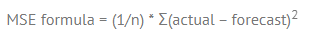
#### <ins><b> Root Mean Square Error:</b></ins> is an applied measure of the differences between numbers(population values and samples) which is predicted by an estimator. It describes the sample standard deviation of the differences between the predicted and observed values. 0.57 means that the model's performance is good

## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

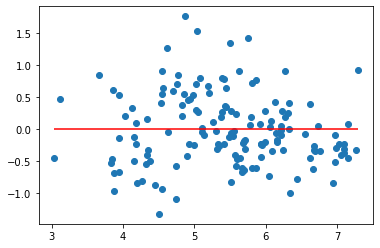

In [46]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red')
plt.show()

We want our predictions to be close to zero on the y-axis in this plot.